# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

## Esercizio 01.1

Per testare il generatore di numeri pseudo-casuali, il primo esercizio consiste nello stimare il valore medio $\langle r \rangle$ e la varianza $\sigma^2$ di una variabile casuale distribuita uniformemente  nell'intervallo $[0,1)$ e verificare che essi convergano ai valori attesi dalla teoria:
$$\langle r \rangle = \int_0^1 r dr = 1/2$$
$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$ 
In entrambi i casi, come stima dell'incertezza statistica viene usata la deviazione standard della media trovata usando il metodo a blocchi: $M = 10^4$ lanci vengono divisi in $N = 10^2$ blocchi, ognuno composto quindi da $L = M/N = 10^2$ lanci. Sommando progressivamente le medie, le medie al quadrato, le varianze e le varianze al quadrato degli N blocchi di L lanci, si arriva alla stima della media cumulativa e dell'errore statistico come deviazione standard della media. N deve essere scelto in modo tale che N<M, N deve dividere M esattamente e in ogni blocco ci deve essere un numero sufficiente di lanci per ottenere una buona stima della media.
### Parte 1 -  valore medio $\langle r \rangle$

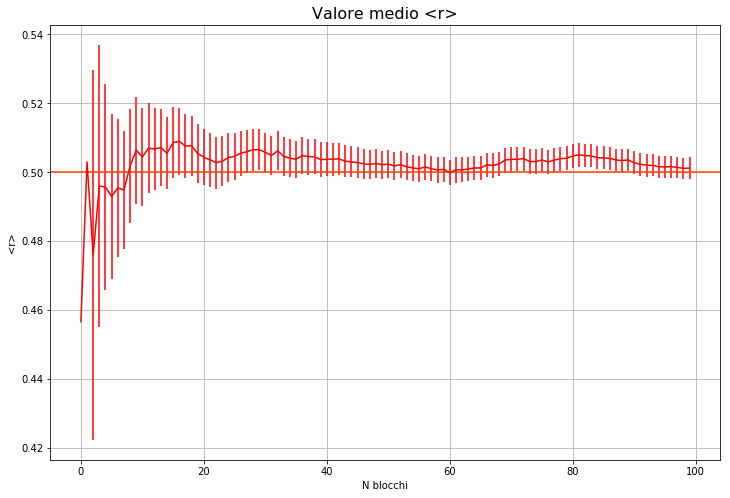

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err = np.loadtxt("es1/Parti_1_2/medie.out",usecols=(0,1,2), unpack = True)
fig = plt.figure(figsize=(12,8))
plt.errorbar(x,y,yerr=err,color='red');
plt.xlabel('N blocchi')
plt.ylabel('<r>');
plt.grid(True)
plt.axhline(y=0.5, color='orangered', linestyle='-')
plt.title("Valore medio <r>", fontsize=16)
plt.show()

Nel grafico è riportata la stima del valore medio $\langle r \rangle$ in funzione del numero di blocchi N e come si può vedere essa, all'aumentare del numero di blocchi e quindi dei lanci, converge al valore 1/2 quasi ovunque entro le incertezze che, all'aumentare del numero di blocchi, diminuiscono.

### Parte 2 -  varianza $\sigma^2$

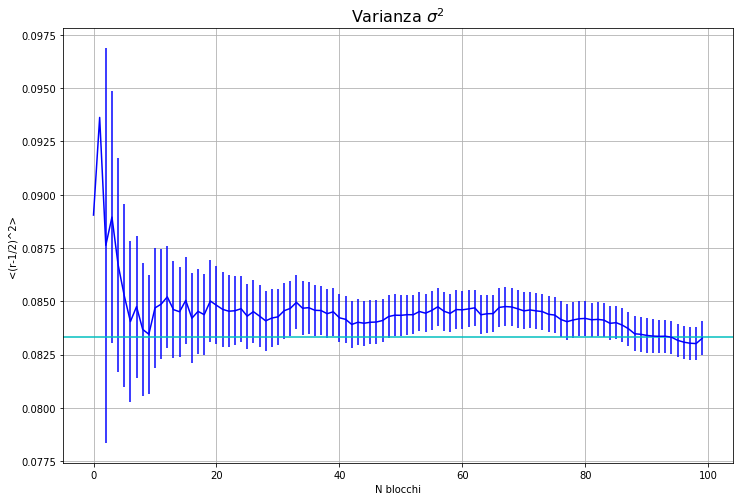

In [3]:
x,y,err = np.loadtxt("es1/Parti_1_2/varianze.out",usecols=(0,1,2), unpack = True) 
fig = plt.figure(figsize=(12,8))
plt.errorbar(x,y,yerr=err,color='blue');
plt.xlabel('N blocchi')
plt.ylabel('<(r-1/2)^2>');
plt.grid(True)
plt.axhline(y=1/12, color='c', linestyle='-')
plt.title("Varianza $\sigma^2$", fontsize=16)
plt.show()

Nel grafico è riportata la stima della varianza $\sigma^2$ in funzione del numero di blocchi N e come si può vedere essa, all'aumentare del numero di blocchi e quindi dei lanci, converge al valore 1/12 quasi ovunque entro le incertezze che, all'aumentare del numero di blocchi, diminuiscono.

### Parte 3 -  test del <font color="green">$\chi^2$</font>
Dato che non è possibile dimostrare direttamente che dei numeri siano stati ottenuti da una certa distribuzione come quella uniforme, stimiamo la probabilità che essi **non** siano stati estratti da una distribuzione uniforme; se essa è bassa si rigetta questa ipotesi. Ciò viene fatto grazie al test del <font color="green">$\chi^2$</font>: dividiamo l'intervallo $[0,1]$ in $M=10^2$ intervalli *i* identici ed estraiamo $n=10^4$ numeri casuali per j = 1,2,..100 volte. Dato che ci aspettiamo che la distribuzione sia uniforme, in ognuno degli M intervalli sono attesi n/M = 100 numeri. Il $\chi^2$ è in generale dato da 
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
con $O_i$ numero di osservazioni ed $E_i$ valore atteso. Applicando ciò al nostro caso, si ha che $O_i = n_i$ cioè il numero di osservazioni nel bin i-esimo, ed $E_i=n/M$ cioè il valore atteso nel bin i-esimo: 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
In media ci aspettiamo che $(n_i - n/M)^2 \simeq n/M$ e quindi $\chi^2 \simeq 100$: se trovassimo un $\chi^2 >> 100$, ciò potrebbe significare che la nostra distribuzione non sia uniforme.
Ripetiamo quindi questo calcolo del $\chi^2$ per j=1,..,100 volte e il risultato è mostrato nel grafico qui sotto.


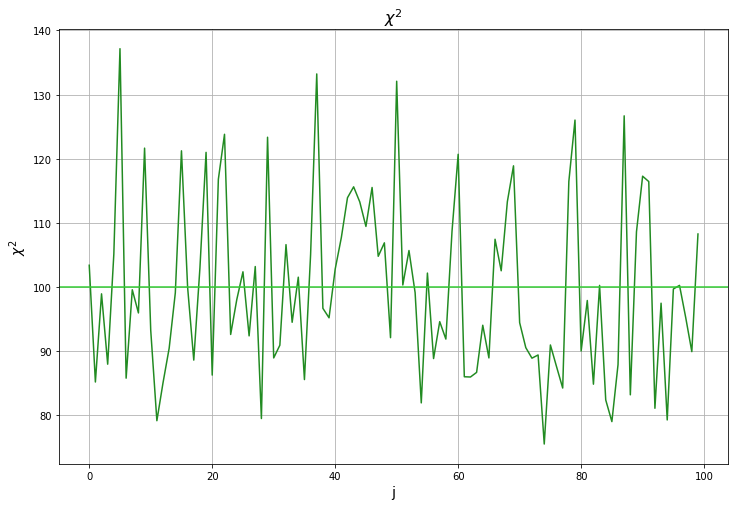

In [4]:
j,chi = np.loadtxt("es1/Parte_3/chi_quadro.out",usecols=(0,1), unpack = True) 
fig = plt.figure(figsize=(12,8))
plt.title('$\chi^2$', fontsize=16)
plt.plot(j,chi, color='forestgreen')
plt.xlabel('j', fontsize=14)
plt.ylabel('$\chi^2$', fontsize=14)
plt.axhline(y=100, color='limegreen', linestyle='-')
plt.grid(True)
plt.show()

## Esercizio 01.2
Il generatore di numeri pseudo-casuali può essere esteso ad altre distribuzioni di probabilità p(x) usando il *metodo della trasformata inversa*. Sia r una variabile casuale distribuita uniformemente con p.d.f. $g(r)=1$ per $r \in [0;1]$ e 0 altrove; si vuole determinare la funzione x(r) tale che x sia distribuita secondo la p.d.f. p(x). Il metodo consiste nell'eguagliare la probabilità di ottenere $x \in [x(r),x(r)+dx(r)]$ alla probabilità di ottenere $r \in [r,r+dr]$ e passare alle distribuzioni cumulative G di g e P di p:

$$ p(x)dx = g(r)dr \rightarrow P(x(r)) = G(r) = \int_{-\infty}^1 1 dr = r$$ 

Se l'equazione $P(x(r))=r$ può essere invertita analiticamente, si può ottenere la funzione x(r) cercata. Questo metodo può essere usato per:
1. la **distribuzione esponenziale** $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, per cui si ottiene che $x(r) = \frac{- ln(1-r)}{\lambda}$;
2. la **distribuzione di Cauchy-Lorentz** $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$, per cui si ottiene che $x(r) = \Gamma \tan[\pi(r-1/2)]+\mu$.

Dopo aver implementato queste due nuove distribuzioni nel generatore di numeri casuali, le utilizziamo per verificare il **Teorema del Limite Centrale**. Esso afferma che, date $r_i$ n variabili casuali indipendenti, ognuna con media $\mu_i$ e varianza ${\sigma_i}^2$ (non divergente), allora per n "molto grande", la variabile casuale $r = \sum_{i=1}^n r_i$ è distribuita come una gaussiana con valore medio $\mu = \sum_{i=1}^n \mu_i$ e varianza $\sigma^2= \sum_{i=1}^n {\sigma_i}^2$. Il teorema vale indipendentemente dalla natura delle distribuzioni delle $r_i$, basta che siano indipendenti e casuali: esso può quindi essere applicato nel caso del dado standard ed esponenziale, mentre nel caso della distribuzione di Cauchy-Lorentz no in quanto non ha varianza definita.

Per verificare ciò ho riportato per i 3 diversi casi degli istogrammi di $S_N = \frac{1}{N}\sum_{i=1}^N r_i$ (per $N=1, 2, 10, 100$), con $r_i$ una varibile casuale campionata lanciando un dado *standard* (caso 1), un dado *esponenziale* (caso 2, con $\lambda=1$) e un dado *Lorentziano* (caso 3, con $\mu=0$ e $\Gamma=1$). Per il dado *standard* e quello *esponenziale* è stato possibile fittare il caso N=100 con una Gaussiana, mentre per il caso 3 è stato necessario fittare con una distribuzione di Cauchy-Lorentz.

### 1) Dado Standard

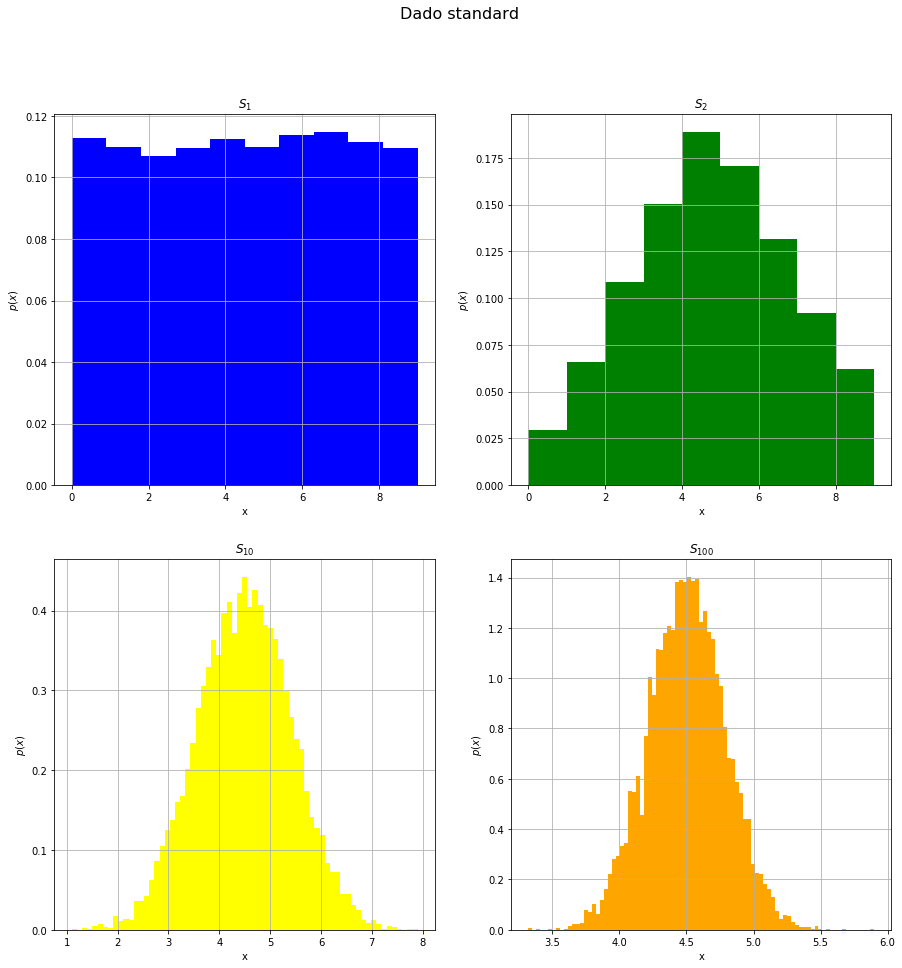

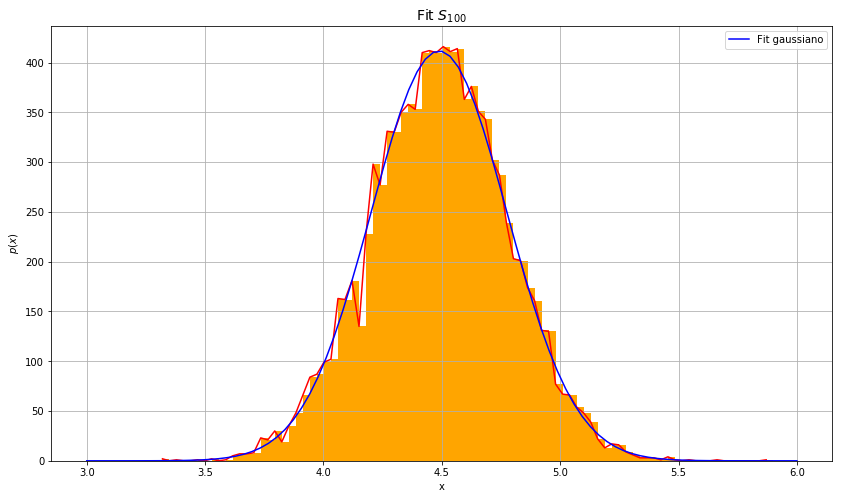

Optimized parameters [a,b,c] =
[411.66640554   6.07613659   4.48833585]
Parameters uncertainty =
[3.72758085e+00 1.27059743e-01 2.99932125e-03]
Mean =  4.488335845770683
Dev_Std =  0.2868608218134181


In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_1,x_2,x_10,x_100 = np.loadtxt("es2/dado_std.dat",usecols=(0,1,2,3), unpack = True) 

fig = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('Dado standard',fontsize=16)

#N=1
ax1=plt.subplot(2,2,1)
ax1.hist(x_1, 10, color="blue", density=True)
ax1.set_xlabel('x')
ax1.set_ylabel("$p(x)$");
ax1.set_title("$S_1$")
ax1.grid(True)

#N=2
ax2=plt.subplot(2,2,2)
ax2.hist(x_2, 9, color="green", density=True)
ax2.set_xlabel('x')
ax2.set_ylabel("$p(x)$");
ax2.set_title("$S_2$")
ax2.grid(True)

#N=10
ax3=plt.subplot(2,2,3)
ax3.hist(x_10, 67, color="yellow", density=True)
ax3.set_xlabel('x')
ax3.set_ylabel("$p(x)$");
ax3.set_title("$S_{10}$")
ax3.grid(True)

#N=100
ax4=plt.subplot(2,2,4)
ax4.hist(x_100, 87, color="orange", density=True)
ax4.set_xlabel('x')
ax4.set_ylabel("$p(x)$");
ax4.set_title("$S_{100}$")
ax4.grid(True)

def f(x,a,b,c):  #definisco la funzione per il fit, b è 1/(2sigma^2)
    return a * np.exp(-b*(x-c)**2)  

fig2=plt.figure(figsize=(14, 8))
x = np.linspace(3,6,87,endpoint=True)
counts, bins = np.histogram(x_100,87)
plt.hist(bins[:-1], bins, weights=counts, color="orange")

p_opt, p_cov = curve_fit(f, bins[:-1], counts)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bins[:-1],counts, color="red")
plt.plot(x,y_fit, color = "blue",label='Fit gaussiano')
plt.title('Fit '+ "$S_{100}$", fontsize=14)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

print("Optimized parameters [a,b,c] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("Mean = ", p_opt[2])
print("Dev_Std = ", np.sqrt(1/(2*p_opt[1])))


L'istogramma di $S_N$ con N=100 può quindi essere ben fittato da una gaussiana.
### 1) Dado Esponenziale

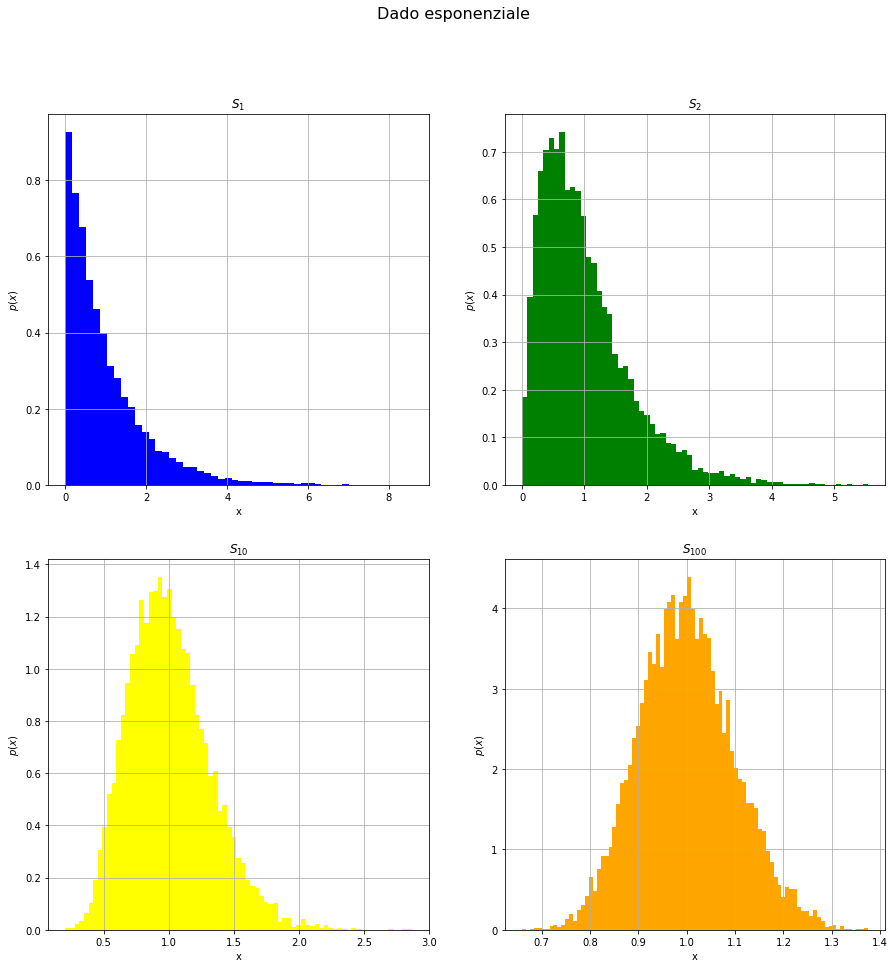

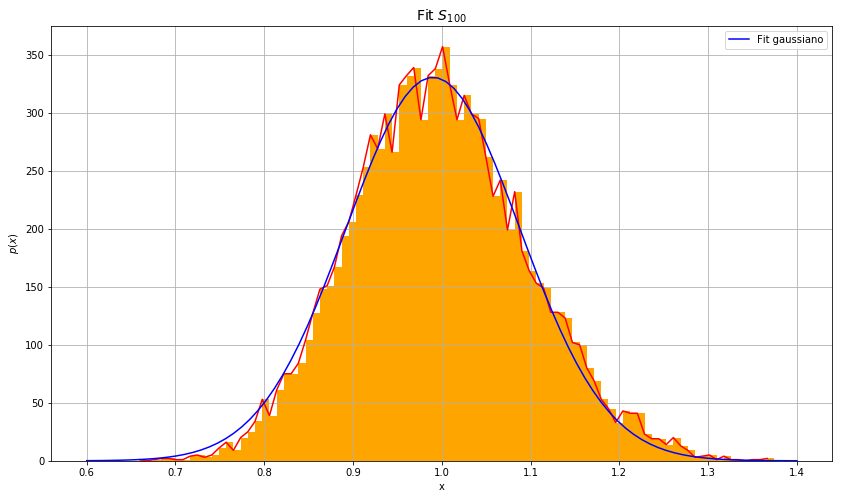

Optimized parameters [a,b,c] =
[330.52442675  52.3015206    0.99001719]
Parameters uncertainty =
[3.22800285e+00 1.17970998e+00 1.10260327e-03]
Mean =  0.9900171933905904
Dev_Std =  0.09777500444233617


In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_1,x_2,x_10,x_100 = np.loadtxt("es2/dado_exp.dat",usecols=(0,1,2,3), unpack = True) 

fig = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('Dado esponenziale',fontsize=16)

#N=1
ax1=plt.subplot(2,2,1)
ax1.hist(x_1, 50, color="blue", density=True)
ax1.set_xlabel('x')
ax1.set_ylabel("$p(x)$");
ax1.set_title("$S_1$")
ax1.grid(True)

#N=2
ax2=plt.subplot(2,2,2)
ax2.hist(x_2, 65, color="green", density=True)
ax2.set_xlabel('x')
ax2.set_ylabel("$p(x)$");
ax2.set_title("$S_2$")
ax2.grid(True)

#N=10
ax3=plt.subplot(2,2,3)
ax3.hist(x_10, 75, color="yellow", density=True)
ax3.set_xlabel('x')
ax3.set_ylabel("$p(x)$");
ax3.set_title("$S_{10}$")
ax3.grid(True)

#N=100
ax4=plt.subplot(2,2,4)
ax4.hist(x_100, 88, color="orange", density=True)
ax4.set_xlabel('x')
ax4.set_ylabel("$p(x)$");
ax4.set_title("$S_{100}$")
ax4.grid(True)

def f(x,a,b,c): 
    return a * np.exp(-b*(x-c)**2)

fig2=plt.figure(figsize=(14, 8))
x = np.linspace(0.6,1.4,88,endpoint=True)
counts, bins = np.histogram(x_100,88)
plt.hist(bins[:-1], bins, weights=counts, color="orange")

p_opt, p_cov = curve_fit(f, bins[:-1], counts)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bins[:-1],counts, color="red")
plt.plot(x,y_fit, color = "blue",label='Fit gaussiano')
plt.title('Fit '+ "$S_{100}$", fontsize=14)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

plt.show()

print("Optimized parameters [a,b,c] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("Mean = ", p_opt[2])
print("Dev_Std = ", np.sqrt(1/(2*p_opt[1])))

L'istogramma di $S_N$ con N=100 può quindi anche per il dado esponeziale essere ben fittato da una gaussiana.
### 1) Dado Lorentziano

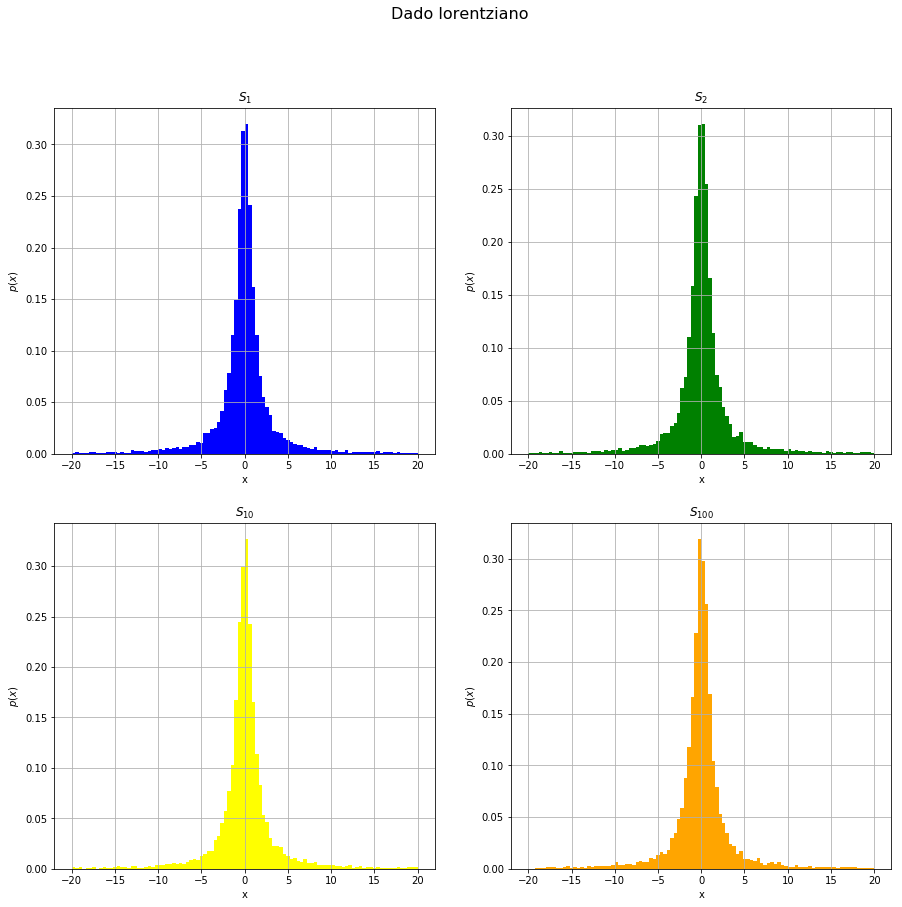

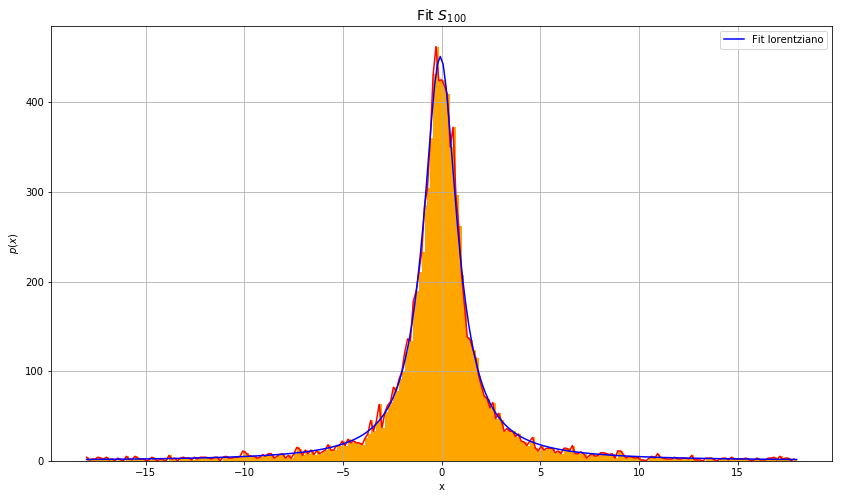

Optimized parameters [mu,gamma,a] =
[-7.21241242e-02  1.02881121e+00  1.45773348e+03]
Parameters uncertainty =
[6.30141443e-03 8.91469057e-03 8.93137409e+00]
Mean =  -0.07212412420929602
Gamma =  1.028811210275131


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_1,x_2,x_10,x_100 = np.loadtxt("es2/dado_lor.dat",usecols=(0,1,2,3), unpack = True) 

fig = plt.subplots(2, 2, figsize=(15, 14))
plt.suptitle('Dado lorentziano',fontsize=16)

#N=1
ax1=plt.subplot(2,2,1)
ax1.hist(x_1, 100, (-20, 20), color="blue", density=True)
ax1.set_xlabel('x')
ax1.set_ylabel("$p(x)$");
ax1.set_title("$S_1$")
ax1.grid(True)

#N=2
ax2=plt.subplot(2,2,2)
ax2.hist(x_2, 100, (-20, 20), color="green", density=True)
ax2.set_xlabel('x')
ax2.set_ylabel("$p(x)$");
ax2.set_title("$S_2$")
ax2.grid(True)

#N=10
ax3=plt.subplot(2,2,3)
ax3.hist(x_10, 100, (-20, 20), color="yellow", density=True)
ax3.set_xlabel('x')
ax3.set_ylabel("$p(x)$");
ax3.set_title("$S_{10}$")
ax3.grid(True)

#N=100
ax4=plt.subplot(2,2,4)
ax4.hist(x_100, 100, (-20, 20), color="orange", density=True)
ax4.set_xlabel('x')
ax4.set_ylabel("$p(x)$");
ax4.set_title("$S_{100}$")
ax4.grid(True)

def f(x,mu,gamma,a):
    return  a*(gamma/np.pi)*(1/((x-mu)**2+(gamma)**2))


fig2=plt.figure(figsize=(14, 8))
x = np.linspace(-18,18,250,endpoint=True)
counts, bins = np.histogram(x_100,250,(-18, 18))
plt.hist(bins[:-1], bins, weights=counts, color="orange")

p_opt, p_cov = curve_fit(f, bins[:-1], counts)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(bins[:-1],counts, color="red")
plt.plot(x,y_fit, color = "blue",label='Fit lorentziano')
plt.title('Fit '+ "$S_{100}$", fontsize=14)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

print("Optimized parameters [mu,gamma,a] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("Mean = ", p_opt[0])
print("Gamma = ", p_opt[1])


Nel caso del dado *lorentziano*, il fit dell'istogramma con N = 100 è stato effettuato con una distribuzione di Cauchy-Lorentz e dal fit si ottiene che essa ha $\mu \sim 0$ e $\Gamma \sim 1$ come ci si poteva aspettare.

## Esercizio 01.3
### Esperimento di Buffon

Un interessante utilizzo dei numeri casuali è l'esperimento di Buffon grazie a cui è possibile stimare <font color="red">$\pi$</font>. L'esperimento consiste nel lanciare un ago di lunghezza L su un piano segnato da delle linee parallele a distanza d l'una dall'altra (d>L). Si dimostrò che la probabilità che l'ago intercetti una delle linee è: $P = \frac{2L}{\pi d}$. Lanciando l'ago un numero M di volte e contando quante volte  $N_{hit}$ questo intercetta le linee, si può quindi stimare $\pi$ come:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LM}{N_{hit}d}$$

Dividendo gli M lanci in N=100 blocchi, è possibile valutare anche le incertezze statistiche con il *metodo a blocchi*. Considero ad esempio un quadrato, con una linea ogni d=2.0 in verticale. Scelgo due numeri casuali $x_c$ e $y_c$: li considero come il centro di una circonferenza di raggio r=L=1. Devo trovare quindi un punto sulla circonferenza centrata in $(x_c,y_c)$, ma non posso farlo invertendo l'equazione della circonferenza perchè avrei dei problemi nell'estrazione uniforme; uso un metodo accept-reject per estrarre uniformemente un angolo e trovo quindi un punto (x,y) sulla circonferenza. A questo punto devo capire se l'ago interseca una delle linee oppure no: approssimo le y e $y_c$ agli interi più vicini con la funzione round() e considero tutti i vari casi possibili per capire se l'ago interseca o meno la linea.

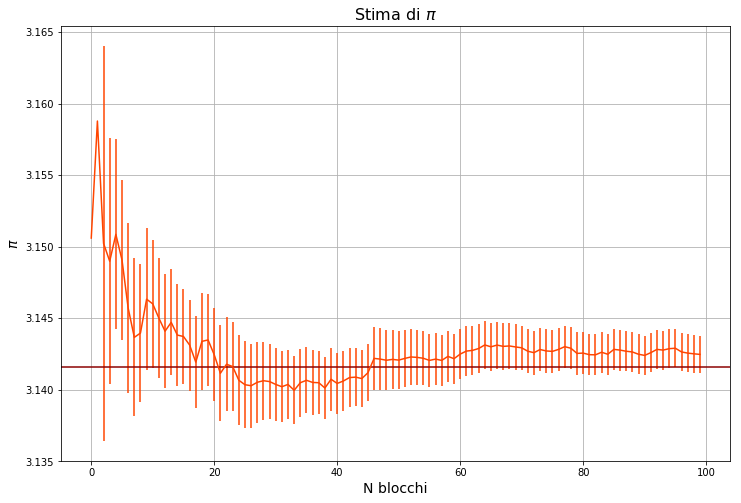

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err = np.loadtxt("es3/pi_greco.out",usecols=(0,1,2), unpack = True)
fig = plt.figure(figsize=(12,8))

plt.errorbar(x,y,yerr=err, color = 'orangered');

plt.xlabel('N blocchi',fontsize ='14')
plt.ylabel('$\pi$',fontsize ='14');
plt.grid(True)
plt.axhline(y=np.pi, color='darkred', linestyle='-')
plt.title("Stima di $\pi$", fontsize ='16')
plt.show()

Nel grafico è mostrato il valore stimato di <font color="red">$\pi$</font> in funzione del numero di blocchi N e come si può vedere esso converge al valore vero entro le incertezze statistiche.